In [2]:
# imports :3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [3]:

# Bringing in the data.
# I do this for both linear regression and clustering, so I feel like I should have it happen out here.

data = pd.read_csv("full_data.csv")

# Sure is annoying having to redefine this. Oh, well!
def zip_extender_and_stringifier(code):
    if len(str(int(code))) != 5:
        return "0" + str(int(code))
    return str(int(code))
data["Zip Code"] = data["Zip Code"].apply(zip_extender_and_stringifier)

data = data.set_index('Zip Code')

#display(data)


In [47]:

# I can't have any categorical variables for clustering, unfortunately.
data_clustering_version = data.copy()
data_clustering_version = data_clustering_version.drop(["Location", "Area Type", "Division", "Region"], axis=1)
data_clustering_version = data_clustering_version.fillna(method='ffill')

# Averaging the rent to try and get more conclusive results.
data_averaging_for_rent = data_clustering_version.drop(["AirPods", "Bananas", "Cotton Swabs", "Diapers", "Eggs", "Gum", "Milk", "Shampoo", "T-Shirt", "Toilet Paper", "Vegetable Oil", "Closest Distro Center", "Unemployment Rate", "Median Income", "Population"], axis=1)
data_averaging_for_rent = data_averaging_for_rent.mean(axis=1)

data_clustering_version["Rent"] = data_averaging_for_rent
data_clustering_version = data_clustering_version.drop(["Studio", "1BR", "2BR", "3BR", "4BR"], axis=1)

display(data_clustering_version)



# Specify the number of clusters
k = 4

# Create k-means object and fit the data
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_clustering_version)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print results
print("Cluster labels:", labels)
print("Centroids:", centroids)

data_clustering_results = data.copy()

data_clustering_results["Cluster"] = labels

data_clustering_results = data_clustering_results.sort_values(["Cluster", "Zip Code"])


# When importing the data as a CSV, make sure to turn the zip code back into an index so it doesn't get in the way.
# Uncomment the line below if you'd prefer to export to a csv instead of working in this file.
# data_clustering_results.to_csv("clustered_data.csv")

display(data_clustering_results)




,AirPods,Bananas,Cotton Swabs,Diapers,Eggs,Gum,Milk,Shampoo,T-Shirt,Toilet Paper,Vegetable Oil,Closest Distro Center,Unemployment Rate,Median Income,Population,Rent
Zip Code,,,,,,,,,,,,,,,,
01040,179.99,1.99,3.39,44.99,4.99,1.79,4.19,9.99,9.6,12.99,9.39,86.245840,3.9,51892.0,38238.0,1521.0
02114,179.99,1.99,3.39,44.99,5.49,1.69,4.19,9.99,9.6,12.99,9.39,145.695293,3.0,135057.0,14469.0,2804.4
02122,179.99,1.99,3.39,44.99,5.49,1.79,4.19,9.99,9.6,12.99,9.39,148.321890,3.4,82945.0,24385.0,2804.4
02865,179.99,1.99,3.39,44.99,4.99,1.69,3.89,9.99,9.6,12.99,9.39,144.662267,3.7,117042.0,17902.0,1694.0
02886,179.99,1.99,3.39,44.99,4.99,1.79,3.89,9.99,9.6,12.99,9.39,153.968645,2.8,91037.0,29373.0,1694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,179.99,1.99,3.39,44.99,4.49,1.79,3.69,9.99,9.6,12.99,9.39,77.515806,5.8,83560.0,16034.0,1828.6
98626,179.99,1.99,3.39,44.99,4.49,1.79,3.69,9.99,9.6,12.99,9.39,62.878349,7.1,70058.0,26291.0,1575.6
98901,179.99,1.99,3.39,44.99,1.99,1.79,3.59,9.99,9.6,12.99,9.39,118.479044,6.7,128143.0,16237.0,1456.2


Cluster labels: [1 0 3 2 2 2 2 0 0 3 1 3 2 2 3 3 1 0 3 0 3 1 1 1 1 2 2 2 1 3 3 2 2 0 2 3 3
 3 3 3 1 0 3 1 1 2 2 2 3 3 1 1 2 1 2 3 0 3 3 3 1 2 1 1 1 3 2 1 1 1 0 1 1 2
 3 1 3 1 3 3 3 1 3 1 1 1 3 1 2 1 2 2 1 1 1 3 2 3 1 2 2 2 1 1 3 1 1 3 2 1 1
 1 0 2 2 0 2 3 2 3 2 1 2 1 2 2 2 2 2 1 1 3 1 2 3 2 1 2 0 2 2 1 1 3 3 3 0 2
 2]
Centroids: [[1.79990000e+02 2.19769231e+00 3.40538462e+00 4.49900000e+01
  4.53615385e+00 1.73615385e+00 3.65153846e+00 9.99000000e+00
  9.60000000e+00 1.30669231e+01 9.39000000e+00 8.98185864e+01
  3.48461538e+00 1.51379462e+05 2.80063077e+04 2.16701538e+03]
 [1.79990000e+02 1.99400000e+00 3.40200000e+00 4.49900000e+01
  4.87800000e+00 1.76000000e+00 3.54600000e+00 1.00020000e+01
  9.60000000e+00 1.30100000e+01 9.41000000e+00 1.55871583e+02
  4.61800000e+00 6.73951400e+04 4.33794600e+04 1.42294800e+03]
 [1.79990000e+02 2.08782609e+00 3.44000000e+00 4.49900000e+01
  4.84217391e+00 1.77913043e+00 3.49000000e+00 1.00030435e+01
  9.60000000e+00 1.31247826e+01 9.45956522e+00 

,AirPods,Bananas,Cotton Swabs,Diapers,Eggs,Gum,Milk,Shampoo,T-Shirt,Toilet Paper,...,Studio,1BR,2BR,3BR,4BR,Division,Region,Median Income,Population,Cluster
Zip Code,,,,,,,,,,,,,,,,,,,,,
02114,179.99,1.99,3.39,44.99,5.49,1.69,4.19,9.99,9.6,12.99,...,2163.0,2288.0,2711.0,3266.0,3594.0,New England,Northeast,135057.0,14469.0,0
03110,179.99,1.99,3.39,44.99,4.99,1.69,3.49,9.99,9.6,12.99,...,1184.0,1192.0,1564.0,1917.0,2405.0,New England,Northeast,160253.0,23322.0,0
03840,179.99,1.99,3.39,44.99,4.99,1.69,3.49,9.99,9.6,12.99,...,1526.0,1536.0,2015.0,2824.0,2935.0,New England,Northeast,147132.0,4076.0,0
07310,179.99,1.99,3.39,44.99,4.99,1.69,3.99,9.99,9.6,12.99,...,1999.0,2029.0,2299.0,2822.0,3218.0,Mid-Atlantic,Northeast,172946.0,17546.0,0
11217,179.99,1.99,3.39,44.99,5.39,1.69,4.49,9.99,9.6,12.99,...,2233.0,2330.0,2580.0,3215.0,3469.0,Mid-Atlantic,Northeast,158314.0,42417.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87402,179.99,1.99,3.39,44.99,4.99,1.79,3.39,9.99,9.6,12.99,...,841.0,855.0,1034.0,1449.0,1571.0,Mountain,West,76992.0,11646.0,3
89705,179.99,1.99,3.39,44.99,1.49,1.79,4.69,9.99,9.6,12.99,...,1004.0,1199.0,1464.0,2051.0,2458.0,Mountain,West,78269.0,5266.0,3
98233,179.99,1.99,3.39,44.99,1.99,1.79,3.49,9.99,9.6,12.99,...,1166.0,1300.0,1701.0,2384.0,2592.0,Pacific,West,83560.0,16034.0,3


---Model for AirPods---
Mean Squared Error: 3.2311742677852644e-27
Coefficients for AirPods:
	Bananas: 6.552417445279534e-25
	Cotton Swabs: 2.9757051318566352e-24
	Diapers: 5.290991908547274e-35
	Eggs: -1.0348461173853773e-26
	Gum: 3.727505806871466e-25
	Milk: 9.119433483299623e-27
	Shampoo: -1.6765456292104107e-24
	T-Shirt: -1.1020259538960495e-39
	Toilet Paper: -2.777941870993212e-24
	Vegetable Oil: 2.734424440959549e-24
	Closest Distro Center: -3.0013957213026e-28
	Unemployment Rate: -4.220100725731912e-27
	Median Income: 1.4860257496230033e-33
	Population: 3.3414386139780698e-31
	Rent: 1.3245901629320305e-29

Leading coeff for AirPods is Cotton Swabs


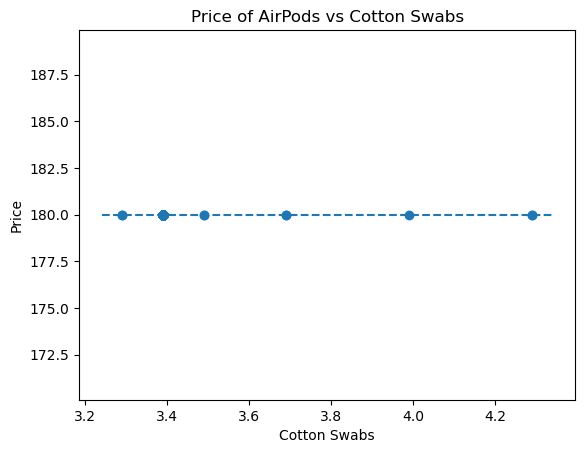

---Model for Bananas---
Mean Squared Error: 0.018963895905874682
Coefficients for Bananas:
	AirPods: -1.6173280573788457e-16
	Cotton Swabs: -2.670280211135414
	Diapers: -1.1402870175368326e-10
	Eggs: -0.0013746740669273397
	Gum: -0.5410744729362743
	Milk: 0.013443112090093884
	Shampoo: 1.7674636211558765
	T-Shirt: -1.5339632317067793e-12
	Toilet Paper: 3.344027753922559
	Vegetable Oil: -3.237617206152815
	Closest Distro Center: -2.4914943266041663e-05
	Unemployment Rate: -0.00398820083156247
	Median Income: 3.048639348141785e-08
	Population: 7.738426113510748e-07
	Rent: -2.3582130308954022e-05

Leading coeff for Bananas is Toilet Paper


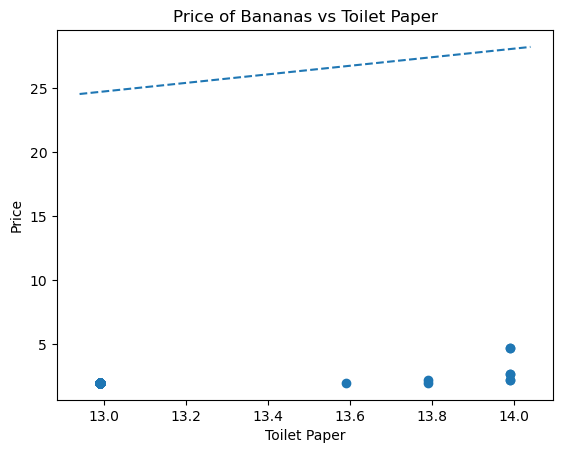

---Model for Cotton Swabs---
Mean Squared Error: 0.0003841033327317826
Coefficients for Cotton Swabs:
	AirPods: -1.3608202344328502e-17
	Bananas: -0.24243701189959044
	Diapers: 2.9420005304107743e-12
	Eggs: -0.0015388963135009553
	Gum: -0.16656169237362867
	Milk: -0.004805805760688457
	Shampoo: 0.7949356061597752
	T-Shirt: 8.154107947680616e-14
	Toilet Paper: 0.9817443497820512
	Vegetable Oil: -0.9481846282397428
	Closest Distro Center: 9.269308191984264e-05
	Unemployment Rate: 0.0005469041242365222
	Median Income: -1.5906122330328746e-07
	Population: -2.2969861701108307e-08
	Rent: 2.463407155687821e-06

Leading coeff for Cotton Swabs is Toilet Paper


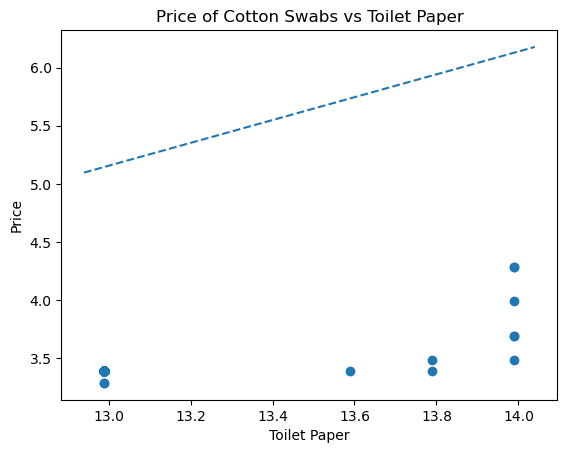

---Model for Diapers---
Mean Squared Error: 2.0194839173657902e-28
Coefficients for Diapers:
	AirPods: -3.419441891225328e-49
	Bananas: -4.219002860271784e-26
	Cotton Swabs: -1.3383718239835385e-25
	Eggs: 1.317056761772608e-27
	Gum: -1.7685337304788584e-26
	Milk: -3.0793567665681183e-28
	Shampoo: 1.0593158670333855e-25
	T-Shirt: 1.4771944388019174e-38
	Toilet Paper: 1.602064732158356e-25
	Vegetable Oil: -1.6910404141684279e-25
	Closest Distro Center: 1.0243827861084673e-30
	Unemployment Rate: -1.485670798118984e-28
	Median Income: -6.351505781739696e-33
	Population: -1.262022506737886e-32
	Rent: -8.350883461138166e-31

Leading coeff for Diapers is Vegetable Oil


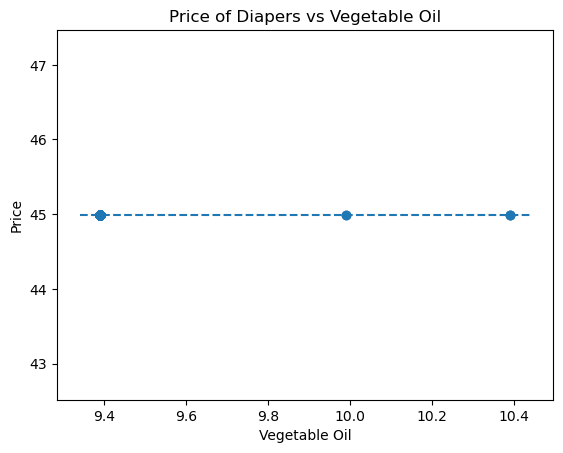

---Model for Eggs---
Mean Squared Error: 1.6270600572744982
Coefficients for Eggs:
	AirPods: 1.5328265396246128e-16
	Bananas: 0.08277214893351535
	Cotton Swabs: 4.824162599302175
	Diapers: -1.9001109276759995e-13
	Gum: -2.6271842715800116
	Milk: 0.06660883158577466
	Shampoo: -11.627319596327679
	T-Shirt: -1.1069599555418223e-12
	Toilet Paper: -4.436078320678079
	Vegetable Oil: 5.808587559739131
	Closest Distro Center: 0.0005414296731119136
	Unemployment Rate: -0.04378448339779112
	Median Income: 9.917512335589606e-07
	Population: 6.327253596911596e-06
	Rent: -0.00010204723514285116

Leading coeff for Eggs is Shampoo


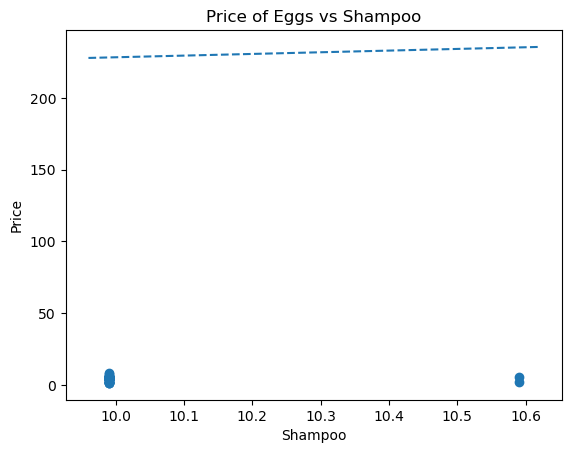

---Model for Gum---
Mean Squared Error: 0.00250631588643622
Coefficients for Gum:
	AirPods: 1.346504969024271e-17
	Bananas: -0.1161676049136681
	Cotton Swabs: -0.3276192721731316
	Diapers: 1.2454597169950836e-14
	Eggs: -0.01230852305726248
	Milk: -0.00029654509306729893
	Shampoo: 0.20418410247300137
	T-Shirt: 5.3439532707160197e-14
	Toilet Paper: 0.4198326840085496
	Vegetable Oil: -0.3274692346207905
	Closest Distro Center: 0.000149450994796492
	Unemployment Rate: -5.3284078514480826e-05
	Median Income: -2.459038873274704e-07
	Population: 2.9676606632292877e-07
	Rent: -1.8813147917918065e-06

Leading coeff for Gum is Toilet Paper


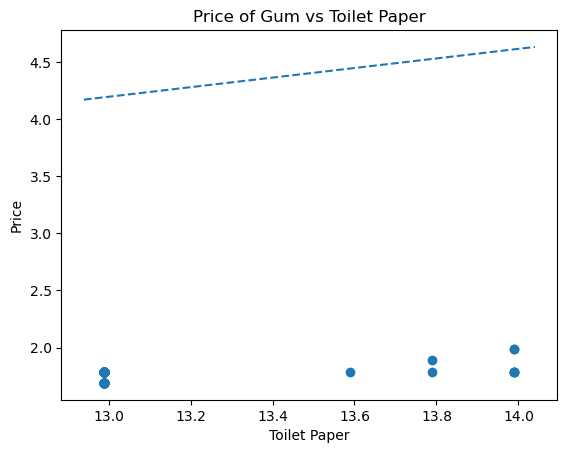

---Model for Milk---
Mean Squared Error: 0.5878724375011005
Coefficients for Milk:
	AirPods: -1.0261144950465525e-17
	Bananas: 0.4871364434570816
	Cotton Swabs: -3.8766287179438064
	Diapers: 5.182975838193537e-13
	Eggs: -0.04477167700460048
	Gum: -2.718313033732925
	Shampoo: 1.249041626398321
	T-Shirt: 4.3010232102023923e-13
	Toilet Paper: 2.408179534882974
	Vegetable Oil: -1.4829537060149067
	Closest Distro Center: 0.0014114768771896194
	Unemployment Rate: -0.0024596904273568275
	Median Income: -6.8300199315973025e-06
	Population: -4.828426782809544e-06
	Rent: 0.00018408898459385805

Leading coeff for Milk is Cotton Swabs


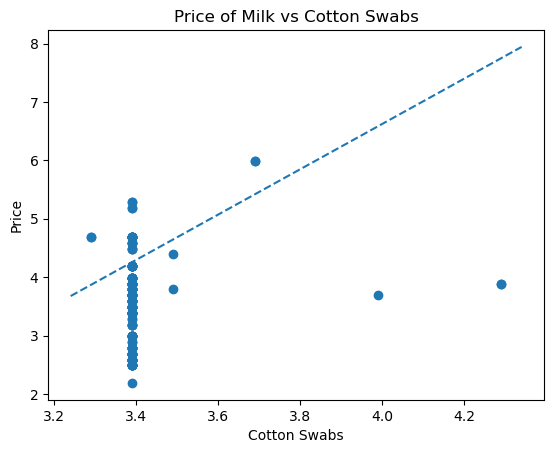

---Model for Shampoo---
Mean Squared Error: 0.003380604064963985
Coefficients for Shampoo:
	AirPods: -5.031344043443221e-17
	Bananas: 0.3699999258781727
	Cotton Swabs: 1.0893888464184007
	Diapers: 1.722060870545318e-12
	Eggs: -0.0027403172664229583
	Gum: 0.06137659596211193
	Milk: 0.0017954528793467496
	T-Shirt: 9.27750502243941e-13
	Toilet Paper: -1.3332863438270193
	Vegetable Oil: 1.2829680796880447
	Closest Distro Center: 1.3785380445605642e-05
	Unemployment Rate: 0.0012921377783952687
	Median Income: 2.1069094519654148e-07
	Population: 1.0088695935898024e-07
	Rent: -6.018654248501956e-06

Leading coeff for Shampoo is Toilet Paper


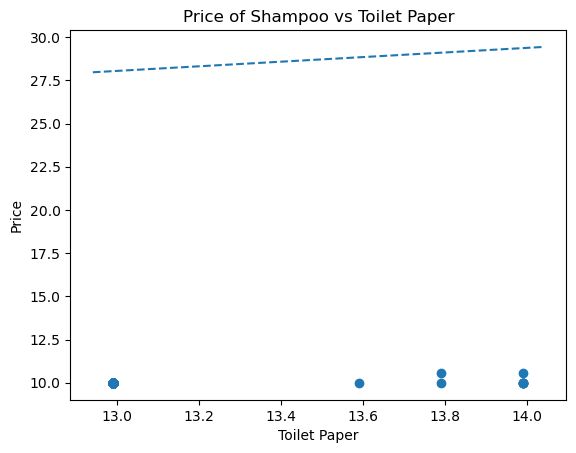

---Model for T-Shirt---
Mean Squared Error: 5.048709793414476e-29
Coefficients for T-Shirt:
	AirPods: 1.5287014528491434e-42
	Bananas: -1.4947224294017782e-26
	Cotton Swabs: -4.62078962340376e-26
	Diapers: -3.9146616541851733e-38
	Eggs: 2.7152238876684416e-28
	Gum: -5.223404115042856e-27
	Milk: -6.334200647108506e-29
	Shampoo: 1.1694676463869193e-40
	Toilet Paper: 5.547158212128315e-26
	Vegetable Oil: -5.804691353719722e-26
	Closest Distro Center: -4.81487047888931e-31
	Unemployment Rate: -6.082712281406958e-29
	Median Income: -4.66349081867601e-33
	Population: -2.6096861836234216e-33
	Rent: -8.941548039109115e-32

Leading coeff for T-Shirt is Vegetable Oil


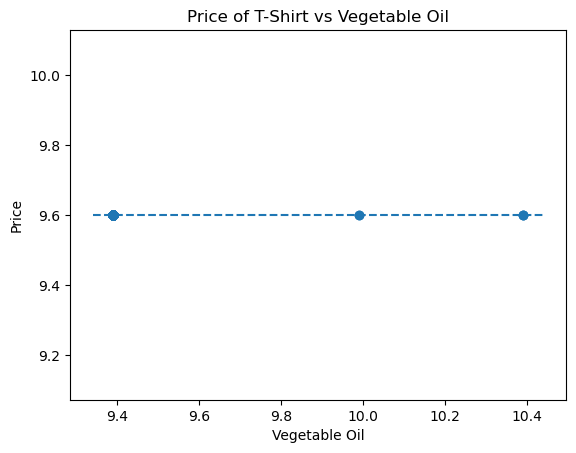

---Model for Toilet Paper---
Mean Squared Error: 0.0025826101008226145
Coefficients for Toilet Paper:
	AirPods: 3.0960889382751965e-17
	Bananas: 0.2619614796667419
	Cotton Swabs: 0.8970168677974667
	Diapers: -5.989560519840445e-13
	Eggs: -0.0023645014427449208
	Gum: 0.14665691693259333
	Milk: 0.0008903952307038525
	Shampoo: -0.9843515877483127
	T-Shirt: -2.5390510555463557e-13
	Vegetable Oil: 0.9718830497572829
	Closest Distro Center: -3.497935039715346e-05
	Unemployment Rate: 0.0004920159349416506
	Median Income: -2.5229681277710888e-08
	Population: -9.665939244176013e-08
	Rent: 8.156982041870928e-06

Leading coeff for Toilet Paper is Shampoo


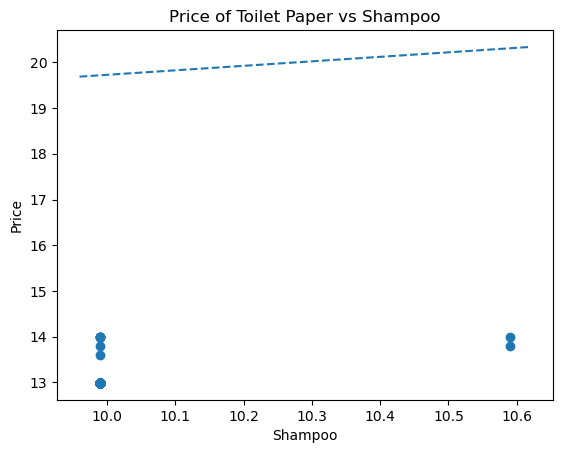

---Model for Vegetable Oil---
Mean Squared Error: 0.0788745305723613
Coefficients for Vegetable Oil:
	AirPods: 1.3481881397191713e-17
	Bananas: -0.38671233159225477
	Cotton Swabs: 0.38145249807371207
	Diapers: 9.23129633872757e-12
	Eggs: 0.0019576730358565574
	Gum: -0.06683740401549593
	Milk: 0.0023150659973240574
	Shampoo: 0.497133022808367
	T-Shirt: 4.67692554142919e-12
	Toilet Paper: 0.9380337973975826
	Closest Distro Center: 4.420287239556693e-05
	Unemployment Rate: 0.0007852393065338922
	Median Income: 8.440054282797374e-08
	Population: 6.275806734836353e-08
	Rent: -5.135196346702116e-06

Leading coeff for Vegetable Oil is Toilet Paper


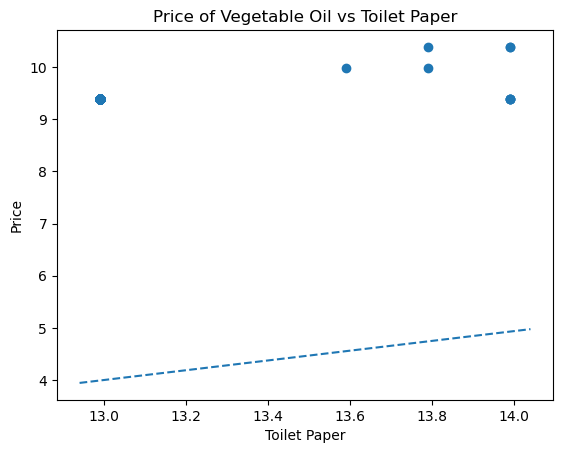

done!


In [11]:
# Linear Regression! I think I got everything I need for this? I kinda wish it had more visualization to it, but I couldn't really do that.

data_modeling_version = data.drop(["Location", "Area Type", "Division", "Region"], axis=1)
data_modeling_version = data_modeling_version.fillna(method='ffill')

# Averaging the rent to try and get more conclusive results.
data_averaging_for_rent = data_modeling_version.drop(["AirPods", "Bananas", "Cotton Swabs", "Diapers", "Eggs", "Gum", "Milk", "Shampoo", "T-Shirt", "Toilet Paper", "Vegetable Oil", "Closest Distro Center", "Unemployment Rate", "Median Income", "Population"], axis=1)
data_averaging_for_rent = data_averaging_for_rent.mean(axis=1)

data_modeling_version["Rent"] = data_averaging_for_rent
data_modeling_version = data_modeling_version.drop(["Studio", "1BR", "2BR", "3BR", "4BR"], axis=1)





# I'll need this for later.
coeff_labels = ['Closest Distro Center', 'Unemployment Rate', 'Median Income', 'Population', 'Rent']

product_list = ['AirPods', 'Bananas', 'Cotton Swabs', 'Diapers', 'Eggs', 'Gum', 'Milk', 'Shampoo', 'T-Shirt', 'Toilet Paper', 'Vegetable Oil']

for product in product_list:
    # Separate features (X) and target variable (y)
    #X = data_modeling_version.drop(product_list, axis=1)
    X = data_modeling_version.drop(product, axis=1)
    y = data_modeling_version[product]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("---Model for " + product + "---")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    
    
    # grab the coefficients! I'm gonna print them out all neatly.
    coefficients = model.coef_
    
    coeff_labels = ['Closest Distro Center', 'Unemployment Rate', 'Median Income', 'Population', 'Rent']
    modified_product_list = ['AirPods', 'Bananas', 'Cotton Swabs', 'Diapers', 'Eggs', 'Gum', 'Milk', 'Shampoo', 'T-Shirt', 'Toilet Paper', 'Vegetable Oil']
    modified_product_list.remove(product)
    
    coeff_labels = modified_product_list + coeff_labels
    
    
    
    big_ol_print = "Coefficients for " + product + ":\n"
    for x in range(0, len(coefficients)):
        big_ol_print += "\t" + coeff_labels[x] + ": " + str(coefficients[x]) + "\n"
        
    print(big_ol_print)
    
    
    leading_coefficient = 0
    leading_coeff_label = ""
    for x in range(0, len(coefficients)):
        if abs(coefficients[x]) > leading_coefficient:
            leading_coefficient = abs(coefficients[x])
            leading_coeff_label = coeff_labels[x]
    print("Leading coeff for", product, "is", leading_coeff_label)
    
    plt.scatter(x=data_modeling_version[leading_coeff_label], y=data_modeling_version[product], )
    
    
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = model.intercept_ + leading_coefficient * x_vals  # I could also use np.sum(model.coef_) instead of leading_coefficient, but that feels dishonest.
    plt.plot(x_vals, y_vals, '--')
    
    
    plt.title("Price of " + product + " vs " + leading_coeff_label)
    plt.xlabel(leading_coeff_label)
    plt.ylabel("Price")
    
    
    plt.savefig("saved_figures/scatterplot/" + product + " vs " + leading_coeff_label + ".png", dpi=300, bbox_inches='tight')
    
    plt.show()


print("done!")

In [33]:




data_for_mapping = data.copy()


address_data = pd.read_csv('2023_Gaz_zcta_national.txt', sep="\t", header=None)
address_data.columns = address_data.iloc[0]
address_data = address_data.drop(0)
# Why is the column name like this. Who is responsible. I just want to talk.
address_data.rename(columns={'INTPTLONG                                                                                                                                  ':'INTPTLONG'}, inplace=True)

address_data['INTPTLAT'] = address_data['INTPTLAT'].apply(lambda x: float(x))
address_data['INTPTLONG'] = address_data['INTPTLONG'].apply(lambda x: float(x))

address_data = address_data.drop(["ALAND", "AWATER", "ALAND_SQMI", "AWATER_SQMI"], axis=1)

address_data = address_data.rename(columns={'GEOID': 'Zip Code'})
address_data = address_data.set_index('Zip Code', drop=False)


state_map = {
    '06241': 'CT',
    '06042': 'CT',
    '06901': 'CT',
    
    '04952': 'ME', 
    '04086': 'ME', 
    '04401': 'ME',
    
    '01040': 'MA', 
    '02122': 'MA', 
    '02114': 'MA', 
    
    '03840': 'NH', 
    '03110': 'NH', 
    '03063': 'NH', 
    
    '02917': 'RI', 
    '02886': 'RI', 
    '02865': 'RI', 
    
    '05403': 'VT', 

    '08865': 'NJ', 
    '07047': 'NJ', 
    '07310': 'NJ', 
    
    '14020': 'NY', 
    '14850': 'NY', 
    '11217': 'NY',
    
    '16601': 'PA', 
    '17013': 'PA', 
    '19103': 'PA',
    
    '61401': 'IL', 
    '60014': 'IL', 
    '60610': 'IL',
    
    '47401': 'IN', 
    '46383': 'IN', 
    '46237': 'IN',
    
    '49855': 'MI', 
    '48374': 'MI', 
    '48507': 'MI',
    
    '44870': 'OH', 
    '45236': 'OH', 
    '45249': 'OH', 
    
    '54235': 'WI', 
    '53085': 'WI', 
    '53207': 'WI'

}

def get_state(zipcode):
    if zipcode == '79707':
        return 'TX'  # It's stupid that i had to do this, but it works LMAO
    elif zipcode not in state_map:
        #print(zipcode, "not in the map: " + data_for_mapping["Location"][zipcode])
        try:
            final_location = data_for_mapping["Location"][zipcode].split(", ")[1]
        except:
            final_location = ''
        return final_location
    else:
        #print(zipcode, "in the map: " + state_map[zipcode])
        return state_map[zipcode]

    
data_for_mapping['Zip Code'] = data_for_mapping.index
data_for_mapping["State"] = data_for_mapping["Zip Code"].apply(get_state)
data_for_mapping = data_for_mapping.drop('Zip Code',axis=1)


data_for_mapping = data_for_mapping.join(address_data, how='left')





# I'll be so real I don't really know what I'm doing anymore. But I think this will work.

average_prices = data_for_mapping.pivot_table(columns = 'State', values = ['AirPods', 'Bananas', 'Cotton Swabs', 'Diapers', 'Eggs', 'Gum', 'Milk', 'Shampoo', 'T-Shirt', 'Toilet Paper', 'Vegetable Oil'])

prices_average = average_prices.transpose()
prices_average = prices_average.rename(columns={'AirPods': 'Average AirPods Price', 'Bananas': 'Average Bananas Price', 'Cotton Swabs': 'Average Cotton Swabs Price', 'Diapers': 'Average Diapers Price', 'Eggs': 'Average Eggs Price', 'Gum': 'Average Gum Price', 'Milk': 'Average Milk Price', 'Shampoo': 'Average Shampoo Price', 'T-Shirt': 'Average T-Shirt Price', 'Toilet Paper': 'Average Toilet Paper Price', 'Vegetable Oil': 'Average Vegetable Oil Price'})

data_for_mapping = data_for_mapping.join(prices_average, how='left', on="State")






display(data_for_mapping)

#data_for_mapping.to_csv("data_for_mapping.csv")





# replace with "Scatter" or "Heatmap"
plot_of_choice = "Scatter"

if plot_of_choice == "Scatter":
    
    targets = go.Scattergeo(
            lon = data_for_mapping['INTPTLONG'],
            lat = data_for_mapping['INTPTLAT'],
            text = data_for_mapping['Zip Code'],
            marker=dict( color='rgb(226,13,17)' )
            )
    
    distros = go.Scattergeo(
            lon = warehouse_df['INTPTLONG'],
            lat = warehouse_df['INTPTLAT'],
            text = warehouse_df.index,
            marker=dict( color='rgb(114,113,113)' )
            )

    
    targets_and_distros = [targets, distros]
    fig = go.Figure(data = targets_and_distros)
    
    fig.update_traces(name="Targets", selector=dict(marker=dict( color='rgb(226,13,17)' )))
    fig.update_traces(name="Distribution Centers", selector=dict(marker=dict( color='rgb(114,113,113)' )))

    fig.update_layout(
            title = 'Target and Distribution Center Locations',
            geo_scope='usa',
        )
    fig.show()
    fig.write_image("saved_figures/target_distro_scattergeo.png")
    
elif plot_of_choice == "Heatmap":

    product_list = ['AirPods', 'Bananas', 'Cotton Swabs', 'Diapers', 'Eggs', 'Gum', 'Milk', 'Shampoo', 'T-Shirt', 'Toilet Paper', 'Vegetable Oil']
    for product in product_list:

        fig = px.choropleth(data_for_mapping, locations="State",
                            color="Average " + product + " Price", 
                            hover_name="Zip Code",
                            color_continuous_scale=px.colors.sequential.Plasma,  # This one's just came with the example, but I think it looks pretty.
                            locationmode="USA-states", 
                            scope="usa")

        fig.show()
        #fig.write_image("saved_figures/heatmap/" + product + ".png")
    
    
else:
    pass





,AirPods,Bananas,Cotton Swabs,Diapers,Eggs,Gum,Milk,Shampoo,T-Shirt,Toilet Paper,...,Average Bananas Price,Average Cotton Swabs Price,Average Diapers Price,Average Eggs Price,Average Gum Price,Average Milk Price,Average Shampoo Price,Average T-Shirt Price,Average Toilet Paper Price,Average Vegetable Oil Price
Zip Code,,,,,,,,,,,,,,,,,,,,,
01040,179.99,1.99,3.39,44.99,4.99,1.79,4.19,9.99,9.6,12.99,...,1.99,3.39,44.99,5.323333,1.756667,4.19,9.99,9.6,12.99,9.39
02114,179.99,1.99,3.39,44.99,5.49,1.69,4.19,9.99,9.6,12.99,...,1.99,3.39,44.99,5.323333,1.756667,4.19,9.99,9.6,12.99,9.39
02122,179.99,1.99,3.39,44.99,5.49,1.79,4.19,9.99,9.6,12.99,...,1.99,3.39,44.99,5.323333,1.756667,4.19,9.99,9.6,12.99,9.39
02865,179.99,1.99,3.39,44.99,4.99,1.69,3.89,9.99,9.6,12.99,...,1.99,3.39,44.99,5.323333,1.723333,3.89,9.99,9.6,12.99,9.39
02886,NaN,1.99,NaN,44.99,4.99,1.79,NaN,NaN,9.6,NaN,...,1.99,3.39,44.99,5.323333,1.723333,3.89,9.99,9.6,12.99,9.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,179.99,1.99,3.39,44.99,4.49,1.79,3.69,9.99,9.6,12.99,...,2.03,3.51,44.99,2.990000,1.790000,3.63,10.11,9.6,13.19,9.59
98626,179.99,1.99,3.39,44.99,4.49,1.79,3.69,9.99,9.6,12.99,...,2.03,3.51,44.99,2.990000,1.790000,3.63,10.11,9.6,13.19,9.59
98901,179.99,1.99,3.39,44.99,1.99,1.79,3.59,9.99,9.6,12.99,...,2.03,3.51,44.99,2.990000,1.790000,3.63,10.11,9.6,13.19,9.59


In [23]:
# This data is found from this website: https://warehouse.ninja/target-distribution-center-locations/
# I inputted it manually, unfortunately.

warehouse_data = [[34.6449932755897,-86.8473292167007],
                  [33.44847758394,-112.216516477379],
                  [35.4443517679111,-119.184883986437],
                  [34.1129032695058,-117.481059984653],
                  [34.1556649469121,-117.430952966951],
                  [33.8829312577458,-117.266820757673],
                  [38.6830449523077,-121.721678642205],
                  [34.1342886776624,-117.416355370662],
                  [38.2782732480079,-104.467643668806],
                  [39.8102931481305,-104.986460657673],
                  [30.2323049532679,-82.6359163730191],
                  [31.7765737205048,-81.3526562288365],
                  [31.7776443503854,-81.3539269910744],
                  [31.4215451402305,-83.5182432359064],
                  [32.1739955290448,-81.1755252030619],
                  [21.4792398115305,-158.016842329534],
                  [41.9176226241567,-88.7369320728707],
                  [41.8303900458523,-87.7238539644176],
                  [41.8002418685309,-87.7811810344034],
                  [41.4744170168815,-88.1627609565227],
                  [41.9218023710286,-87.9598046121732],
                  [39.7475498809776,-86.2948367214139],
                  [42.4760732243742,-92.468984016849],
                  [38.9662278505392,-95.6943807344034],
                  [38.8653486027871,-76.7299089768994],
                  [44.9647972364202,-85.2029499259567],
                  [45.0979857630195,-93.2491908864199],
                  [44.9933873277923,-93.2149055171079],
                  [44.9452591409893,-92.9121249623863],
                  [40.5251569148739,-74.2592140725181],
                  [40.089765436428,-74.8200981032102],
                  [39.7817015818632,-75.3450861543144],
                  [43.178721716844,-73.7161892865095],
                  [42.9386799514717,-74.2384685711634],
                  [35.6225966445846,-81.3098264595263],
                  [39.9520393926857,-83.3482983306921],
                  [39.9471432044632,-83.3518352558173],
                  [44.5794790802794,-123.115068328716],
                  [40.1989563009857,-76.8052668801052],
                  [39.8890231958012,-77.6729397],
                  [34.1794119094042,-80.6818378840045],
                  [32.4347483116907,-97.0555079725181],
                  [34.5570298314302,-97.1446958584889],
                  [32.8696311238109,-95.6389149051154],
                  [32.8807284643133,-96.901032357673],
                  [29.9461573473188,-95.5288642134904],
                  [38.0306730381623,-78.998851715346],
                  [36.7076274133422,-76.6651214220913],
                  [47.0821524927726,-122.771626284653],
                  [43.080037381646,-88.4760084558174],
                  [42.4825228934735,-92.4709803136662]]

warehouse_df = pd.DataFrame(warehouse_data, columns=['INTPTLAT', 'INTPTLONG'])

display(warehouse_df)


,INTPTLAT,INTPTLONG
0,34.644993,-86.847329
1,33.448478,-112.216516
2,35.444352,-119.184884
3,34.112903,-117.481060
4,34.155665,-117.430953
5,33.882931,-117.266821
6,38.683045,-121.721679
7,34.134289,-117.416355
8,38.278273,-104.467644
9,39.810293,-104.986461
